In [1]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [49]:
df = pd.read_csv("data/Churn_Modelling.csv")

In [50]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [52]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [53]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [61]:
df.shape

(10000, 12)

In [54]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [56]:
scaler = StandardScaler()

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=32)

In [58]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_sacled = scaler.transform(X_test)

In [59]:
X_train_scaled

array([[-1.24955805e+00,  1.96300818e-01, -3.46947306e-01, ...,
        -5.80621947e-01,  1.73320628e+00, -1.10191942e+00],
       [-3.37298789e-01,  1.01136199e-01, -1.72731704e+00, ...,
        -5.80621947e-01, -5.76965369e-01, -1.10191942e+00],
       [ 6.47526545e-01,  1.90926396e+00, -6.92039740e-01, ...,
        -5.80621947e-01, -5.76965369e-01, -1.10191942e+00],
       ...,
       [-4.92797526e-01,  2.91465437e-01,  3.43237562e-01, ...,
        -5.80621947e-01,  1.73320628e+00, -1.10191942e+00],
       [-8.85008103e-02, -1.99248542e+00, -1.85487183e-03, ...,
         1.72229108e+00, -5.76965369e-01,  9.07507376e-01],
       [-1.76788717e+00,  5.97157986e-03, -1.85487183e-03, ...,
        -5.80621947e-01,  1.73320628e+00,  9.07507376e-01]],
      shape=(8000, 11))

In [60]:
X_test_sacled

array([[-0.00556815, -1.80215619,  1.03342243, ..., -0.58062195,
         1.73320628,  0.90750738],
       [ 0.48166123, -0.08919304,  0.34323756, ...,  1.72229108,
        -0.57696537, -1.10191942],
       [ 0.84449161,  0.29146544,  1.37851487, ...,  1.72229108,
        -0.57696537,  0.90750738],
       ...,
       [ 0.83412503, -0.18435766, -0.69203974, ...,  1.72229108,
        -0.57696537,  0.90750738],
       [ 0.24322983,  0.67212391, -1.03713217, ..., -0.58062195,
        -0.57696537,  0.90750738],
       [-0.11960056, -1.13600385, -0.69203974, ...,  1.72229108,
        -0.57696537,  0.90750738]], shape=(2000, 11))

In [66]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim =11))
model.add(Dense(11,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 343 (1.34 KB)

 Trainable params: 343 (1.34 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
model_info_metrics = model.fit(X_test_sacled,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7669 - loss: 0.6191 - val_accuracy: 0.7950 - val_loss: 0.5671
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8019 - loss: 0.5423 - val_accuracy: 0.7950 - val_loss: 0.5208
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8019 - loss: 0.5163 - val_accuracy: 0.7950 - val_loss: 0.5160
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8019 - loss: 0.5100 - val_accuracy: 0.7950 - val_loss: 0.5143
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8019 - loss: 0.5064 - val_accuracy: 0.7950 - val_loss: 0.5129
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8019 - loss: 0.5039 - val_accuracy: 0.7950 - val_loss: 0.5120
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8019 - loss: 0.5017 - val_accuracy: 0.7950 - val_loss: 0.5112
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8019 - loss: 0.4995 - val_accuracy: 0.7950 - v

In [43]:
y_pred = model.predict(X_test_sacled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [44]:
y_pred

array([[0.09374796],
       [0.3928745 ],
       [0.34781438],
       ...,
       [0.06775291],
       [0.09580117],
       [0.12900603]], shape=(2000, 1), dtype=float32)

In [45]:
y_pred = y_pred.argmax(axis=-1)

In [37]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(2000,))

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7915

In [70]:
import matplotlib.pyplot as plt

In [ ]:
model_info_metrics.history['accuracy']

{'accuracy': [0.7668750286102295,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8025000095367432,
  0.8018749952316284,
  0.8025000095367432,
  0.8025000095367432,
  0.8025000095367432,
  0.8025000095367432,
  0.8018749952316284,
  0.8018749952316284,
  0.8018749952316284,
  0.8025000095367432

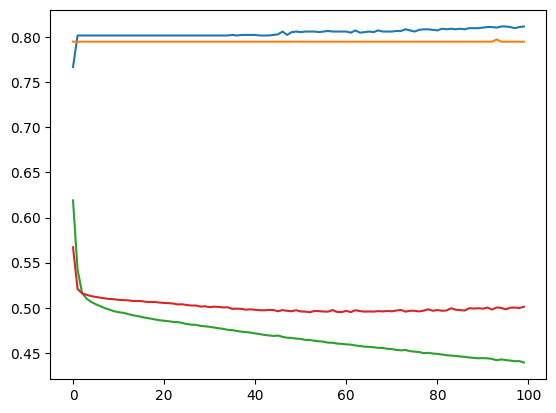

In [78]:
plt.plot(model_info_metrics.history['accuracy'])
plt.plot(model_info_metrics.history['val_accuracy'])
plt.plot(model_info_metrics.history['loss'])
plt.plot(model_info_metrics.history['val_loss'])